In [1]:
import scipy.io
import pandas as pd
import geopandas as gpd
import numpy as np

# Load the .mat file
fname = r"tss_format\tss_format.mat"
mat_data = scipy.io.loadmat(fname, struct_as_record=False)

# Extracting data
tss1 = mat_data['tss1']
tss2 = mat_data['tss2']
tss3 = mat_data['tss3']
basin_1 = mat_data['basin_1']
basin_2 = mat_data['basin_2']
basin_3 = mat_data['basin_3']
date = mat_data['date']

# Reading shapefiles
basin_1_shp = gpd.read_file(r"tss_format\basin_1.shp")
basin_2_shp = gpd.read_file(r"tss_format\basin_2.shp")
basin_3_shp = gpd.read_file(r"tss_format\basin_3.shp")

In [11]:
basin_names_1 = [name_array[0][0] for name_array in basin_1]
basin_names_2 = [name_array[0][0] for name_array in basin_2]
basin_names_3 = [name_array[0][0] for name_array in basin_3]

In [30]:
mat_files = glob.glob(os.path.join('tss_format', "*.mat"))
shp_files = glob.glob(os.path.join('tss_format', "*.shp"))

In [36]:
shp_files

['tss_format\\basin_1.shp',
 'tss_format\\basin_2.shp',
 'tss_format\\basin_3.shp']

In [38]:
# Mapping shapefile names to their respective basin name columns
shp_name_mapping = {
    'basin_1': 'MBASIN_E',
    'basin_2': 'NAME_1',
    'basin_3': 'NAME_2'
    }

# Read all shapefiles into a dictionary
basin_shp_data = {}
for shp_file in shp_files:
    shp_name = os.path.splitext(os.path.basename(shp_file))[0]
    if shp_name in shp_name_mapping:
        basin_shp_data[shp_name] = gpd.read_file(shp_file)

In [80]:
all_data = []  # Store combined data from all .mat files

# Loop through each .mat file
for mat_file in mat_files:
    try:
        data = scipy.io.loadmat(mat_file, struct_as_record=False)

        # Identify tss and basin keys dynamically
        tss_keys = [key for key in data.keys() if key.startswith('tss')]
        basin_keys = [key for key in data.keys() if key.startswith('basin')]
        date = data.get('date')

        if not tss_keys or not basin_keys or date is None:
            print(f"Warning: Missing variables in file {mat_file}. Skipping.")
            continue

        # Convert date to datetime
        df_date = pd.DataFrame(date, columns=['Year', 'Month', 'Day'])
        df_date['Date'] = pd.to_datetime(df_date[['Year', 'Month', 'Day']])

        # Ensure tss and basin keys are paired correctly
        for tss_key, basin_key in zip(tss_keys, basin_keys):
            time_series = pd.DataFrame(data[tss_key])
            basin_array = data[basin_key]

            # Extract basin names
            basin_names = [name_array[0][0] for name_array in basin_array]

            # Rename columns to basin names
            time_series.columns = basin_names

            # Combine date and time series
            df_combined = pd.concat([df_date, time_series], axis=1)

    except Exception as e:
            print(f"❌ Error processing {mat_file}: {e}")

In [78]:
df_combined.tail()

,Year,Month,Day,Date,K. Kut Rang,Kae Dam,Kantharawichai,Kosum Phisai,Muang Maha Sarakam,Na Chuak,...,Yaha,Amphoe Muang Yasothon,Amphoe Sai Mun,Kham Khuan Kaeo,Kho Wang,Kut Chum,Loeng Nok Tha,Maha Chana Chai,Pa Tiu,Thai Charoen
292,2025,5,27,2025-05-27,0.000009,0.000006,0.000006,0.000008,0.000007,0.000008,...,-0.000002,0.000004,0.000004,0.000005,0.000005,0.000004,5.326450e-06,0.000005,0.000006,5.048632e-06
293,2025,5,28,2025-05-28,0.000009,0.000008,0.000007,0.000009,0.000008,0.000009,...,-0.000002,0.000004,0.000004,0.000006,0.000006,0.000004,4.667263e-06,0.000005,0.000006,4.813345e-06
294,2025,5,29,2025-05-29,0.000008,0.000007,0.000007,0.000008,0.000007,0.000008,...,-0.000002,0.000004,0.000004,0.000005,0.000005,0.000004,4.155724e-06,0.000005,0.000005,4.258965e-06
295,2025,5,30,2025-05-30,0.000002,0.000003,0.000003,0.000002,0.000003,0.000002,...,-0.000002,0.000002,0.000002,0.000002,0.000002,0.000001,1.051750e-06,0.000002,0.000001,1.227937e-06
296,2025,5,31,2025-05-31,0.000002,0.000002,0.000002,0.000002,0.000002,0.000001,...,-0.000001,0.000002,0.000001,0.000002,0.000002,0.000001,4.579464e-07,0.000002,0.000001,7.003110e-07


In [73]:
list(basin_1_shp.MBASIN_T)

['สาละวิน',
 'โขงเหนือ',
 'โขงตะวันออกเฉียงเหนือ',
 'ชี',
 'มูล',
 'ปิง',
 'วัง',
 'ยม',
 'น่าน',
 'เจ้าพระยา',
 'เจ้าพระยา (เกาะ)',
 'สะแกกรัง',
 'ป่าสัก',
 'ท่าจีน',
 'แม่กลอง',
 'บางปะกง',
 'โตนเลสาบ',
 'ชายฝั่งทะเลตะวันออก',
 'ชายฝั่งทะเลตะวันออก (เกาะ)',
 'เพชรบุรี-ประจวบคีรีขันธ์',
 'เพชรบุรี-ประจวบคีรีขันธ์ (เกาะ)',
 'ภาคใต้ฝั่งตะวันออกตอนบน',
 'ภาคใต้ฝั่งตะวันออกตอนบน (เกาะ)',
 'ทะเลสาบสงขลา',
 'ทะเลสาบสงขลา (เกาะ)',
 'ภาคใต้ฝั่งตะวันออกตอนล่าง',
 'ภาคใต้ฝั่งตะวันตก',
 'ภาคใต้ฝั่งตะวันตก (เกาะ)']

In [65]:
list(basin_2_shp.NAME_1)

['Chai Nat',
 'Chaiyaphum',
 'Chanthaburi',
 'Chiang Mai',
 'Chiang Rai',
 'Chon Buri',
 'Chumphon',
 'Kalasin',
 'Kamphaeng Phet',
 'Kanchanaburi',
 'Khon Kaen',
 'Krabi',
 'Lampang',
 'Lamphun',
 'Loei',
 'Amnat Charoen',
 'Ang Thong',
 'Bangkok Metropolis',
 'Buri Ram',
 'Chachoengsao',
 'Lop Buri',
 'Mae Hong Son',
 'Maha Sarakham',
 'Mukdahan',
 'Nakhon Nayok',
 'Nakhon Pathom',
 'Nakhon Phanom',
 'Nakhon Ratchasima',
 'Nakhon Sawan',
 'Nakhon Si Thammarat',
 'Nan',
 'Narathiwat',
 'Nong Bua Lam Phu',
 'Nong Khai',
 'Nonthaburi',
 'Pathum Thani',
 'Pattani',
 'Phangnga',
 'Phatthalung',
 'Phatthalung (Songkhla Lake)',
 'Phayao',
 'Phetchabun',
 'Phetchaburi',
 'Phichit',
 'Phitsanulok',
 'Phra Nakhon Si Ayutthaya',
 'Phrae',
 'Phuket',
 'Prachin Buri',
 'Prachuap Khiri Khan',
 'Ranong',
 'Ratchaburi',
 'Rayong',
 'Roi Et',
 'Sa Kaeo',
 'Sakon Nakhon',
 'Samut Prakan',
 'Samut Sakhon',
 'Samut Songkhram',
 'Saraburi',
 'Satun',
 'Si Sa Ket',
 'Sing Buri',
 'Songkhla',
 'Songkhla (S

In [75]:
len(basin_3_shp.NAME_2)

928

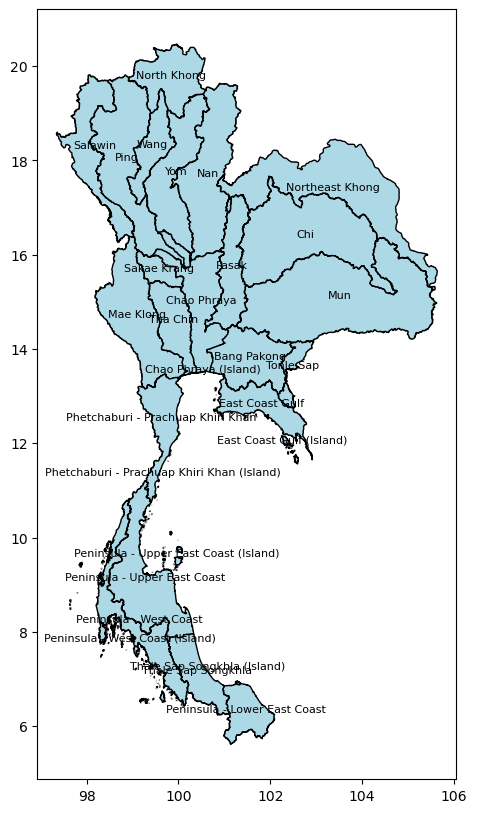

In [125]:
import matplotlib.pyplot as plt


# Plot the geometries
fig, ax = plt.subplots(figsize=(10, 10))
basin_1_shp.plot(ax=ax, color='lightblue', edgecolor='black')

# Add labels for NAME_1
for idx, row in basin_1_shp.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['MBASIN_E'],
            fontsize=8, ha='center', color='black')

# Show the plot
plt.show()

In [85]:
# Load the shapefile using GeoPandas
province_gdf = gpd.read_file(r"C:\Users\ASUS\Jupyter\Thailand\gadm41_THA_shp\gadm41_THA_1.shx")
print(f'Province {province_gdf.head()}')

district_gdf = gpd.read_file(r"C:\Users\ASUS\Jupyter\Thailand\gadm41_THA_shp\gadm41_THA_2.shx")
print(f'Province {district_gdf.head()}')

Province      GID_1 GID_0   COUNTRY              NAME_1  \
0  THA.1_1   THA  Thailand       Amnat Charoen   
1  THA.2_1   THA  Thailand           Ang Thong   
2  THA.3_1   THA  Thailand  Bangkok Metropolis   
3  THA.4_1   THA  Thailand           Bueng Kan   
4  THA.5_1   THA  Thailand            Buri Ram   

                          VARNAME_1          NL_NAME_1    TYPE_1 ENGTYPE_1  \
0                                NA  จังหวัดอำนาจเจริญ  Changwat  Province   
1                                NA     จังหวัดอ่างทอง  Changwat  Province   
2  Bangkok|Krung Thep|Krung Thep Ma   จังหวัดเชียงใหม่  Changwat  Province   
3                                NA             บึงกาฬ  Changwat  Province   
4                          Buri Rum   จังหวัดบุรีรัมย์  Changwat  Province   

  CC_1 HASC_1  ISO_1                                           geometry  
0   37  TH.AC  TH-37  POLYGON ((104.58696 15.60588, 104.58676 15.605...  
1   15  TH.AT  TH-15  POLYGON ((100.38371 14.74216, 100.386 14.7427,...  

In [87]:
len(province_gdf.NAME_1.unique())

77

In [89]:
len(district_gdf.NAME_2.unique())

917

In [31]:
len(basin_2_shp.NAME_1)

78

In [101]:
# Step 1: Check if `NAME_1` matches between the two GeoDataFrames
matching_names = province_gdf['NAME_1'].isin(basin_2_shp['NAME_1'])

In [103]:
len(matching_names)

77

In [93]:
# Filter rows where NAME_1 does not match between the two GeoDataFrames
non_matching_names = province_gdf[~matching_names]

# Print the rows where there is no match in NAME_1
print(non_matching_names)

     GID_1 GID_0   COUNTRY     NAME_1 VARNAME_1 NL_NAME_1    TYPE_1 ENGTYPE_1  \
3  THA.4_1   THA  Thailand  Bueng Kan        NA    บึงกาฬ  Changwat  Province   

  CC_1 HASC_1  ISO_1                                           geometry  
3   NA  TH.BK  TH-38  POLYGON ((103.9914 17.87424, 103.99107 17.8742...  


In [95]:
# Filter rows where NAME_1 does not match between the two GeoDataFrames
ma_names = basin_2_shp['NAME_1'].isin(province_gdf['NAME_1'])
non_names = basin_2_shp[~ma_names]

# Print the rows where there is no match in NAME_1
print(non_names)

    ID_0  ISO    NAME_0  ID_1                       NAME_1 VARNAME_1  \
39   218  THA  Thailand  2860  Phatthalung (Songkhla Lake)      None   
64   218  THA  Thailand  2885     Songkhla (Songkhla Lake)      None   

   NL_NAME_1 HASC_1  CC_1      TYPE_1 ENGTYPE_1 VALIDFR_1 VALIDTO_1  \
39      None   None  None  Water body      Lake   unknown   Present   
64      None   None  None  Water body      Lake   unknown   Present   

         REMARKS_1  Shape_Leng  Shape_Area  \
39  Lake/Estuarium    2.476057    0.037048   
64  Lake/Estuarium    1.857895    0.031399   

                                             geometry  
39  POLYGON ((100.20776 7.78086, 100.22656 7.67131...  
64  POLYGON ((100.28227 7.80024, 100.28264 7.79996...  


In [119]:
# Filter names starting with 'B' or 'b'
names_starting_with_b = basin_2_shp[basin_2_shp['NAME_1'].str.startswith(('B', 'b'), na=False)]

# Display the matching rows
print(names_starting_with_b)

    ID_0  ISO    NAME_0  ID_1              NAME_1  \
17   218  THA  Thailand  2823  Bangkok Metropolis   
18   218  THA  Thailand  2824            Buri Ram   

                                            VARNAME_1         NL_NAME_1  \
17  Bangkok|Krung Thep|Krung Thep Maha Nakhon|Phra...  ????????????????   
18                                           Buri Rum  ????????????????   

   HASC_1 CC_1    TYPE_1 ENGTYPE_1              VALIDFR_1 VALIDTO_1 REMARKS_1  \
17  TH.BM   10  Changwat  Province                  ~1980   Present      None   
18  TH.BR   31  Changwat  Province  between 1915 and 1950   Present      None   

    Shape_Leng  Shape_Area                                           geometry  
17    2.365211    0.130771  POLYGON ((100.6267 13.94395, 100.62648 13.9417...  
18    8.062190    0.845715  POLYGON ((102.93896 15.78453, 102.93933 15.784...  


In [105]:
# Check if the geometries match
matching_geometries = province_gdf.geometry.equals(basin_2_shp.geometry)

# Combine both conditions (matching NAME_1 and matching geometry)
matching_records = province_gdf[matching_names & matching_geometries]

# Print the results
print(f"Number of matching records: {len(matching_records)}")

Number of matching records: 0


In [187]:
print(basin_2_shp.crs)
print(province_gdf.crs)

EPSG:4326
EPSG:4326


In [221]:
from shapely.geometry import Polygon

# Compare using equals() for exact match
print(basin_2_shp[basin_2_shp['NAME_1'] == 'Nong Khai'].geometry.equals(
      province_gdf[province_gdf['NAME_1'] == 'Nong Khai'].geometry))

False


In [227]:
basin_2_shp[basin_2_shp['NAME_1'] == 'Nong Khai'].geometry

33    POLYGON ((103.41059 18.44627, 103.41159 18.446...
Name: geometry, dtype: geometry

In [233]:
province_gdf[province_gdf['NAME_1'] == 'Nong Khai'].geometry

34    POLYGON ((102.70095 17.61725, 102.70074 17.617...
Name: geometry, dtype: geometry

In [235]:
province_gdf[province_gdf['NAME_1'] == 'Bueng Kan'].geometry

3    POLYGON ((103.9914 17.87424, 103.99107 17.8742...
Name: geometry, dtype: geometry

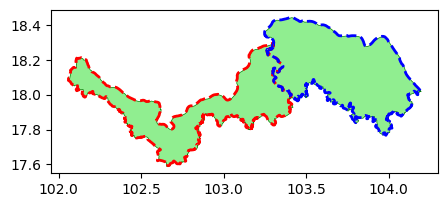

In [237]:
import matplotlib.pyplot as plt

# Plot both geometries for visual comparison
fig, ax = plt.subplots(figsize=(5, 5))

# Plot basin_2_shp boundary for Yala
basin_2_shp[basin_2_shp['NAME_1'] == 'Nong Khai'].plot(ax=ax, facecolor='lightgreen', 
                                                       edgecolor='green', linewidth=0.5, label='Nong Khai')

# Plot province_gdf boundary for Yala
province_gdf[province_gdf['NAME_1'] == 'Nong Khai'].plot(ax=ax, facecolor='none', 
                                                         edgecolor='red', linestyle='--', linewidth=2, label='Nong Khai')

# Plot province_gdf boundary for Yala
province_gdf[province_gdf['NAME_1'] == 'Bueng Kan'].plot(ax=ax, facecolor='none', 
                                                         edgecolor='blue', linestyle='--', linewidth=2, label='Bueng Kan')

plt.show()

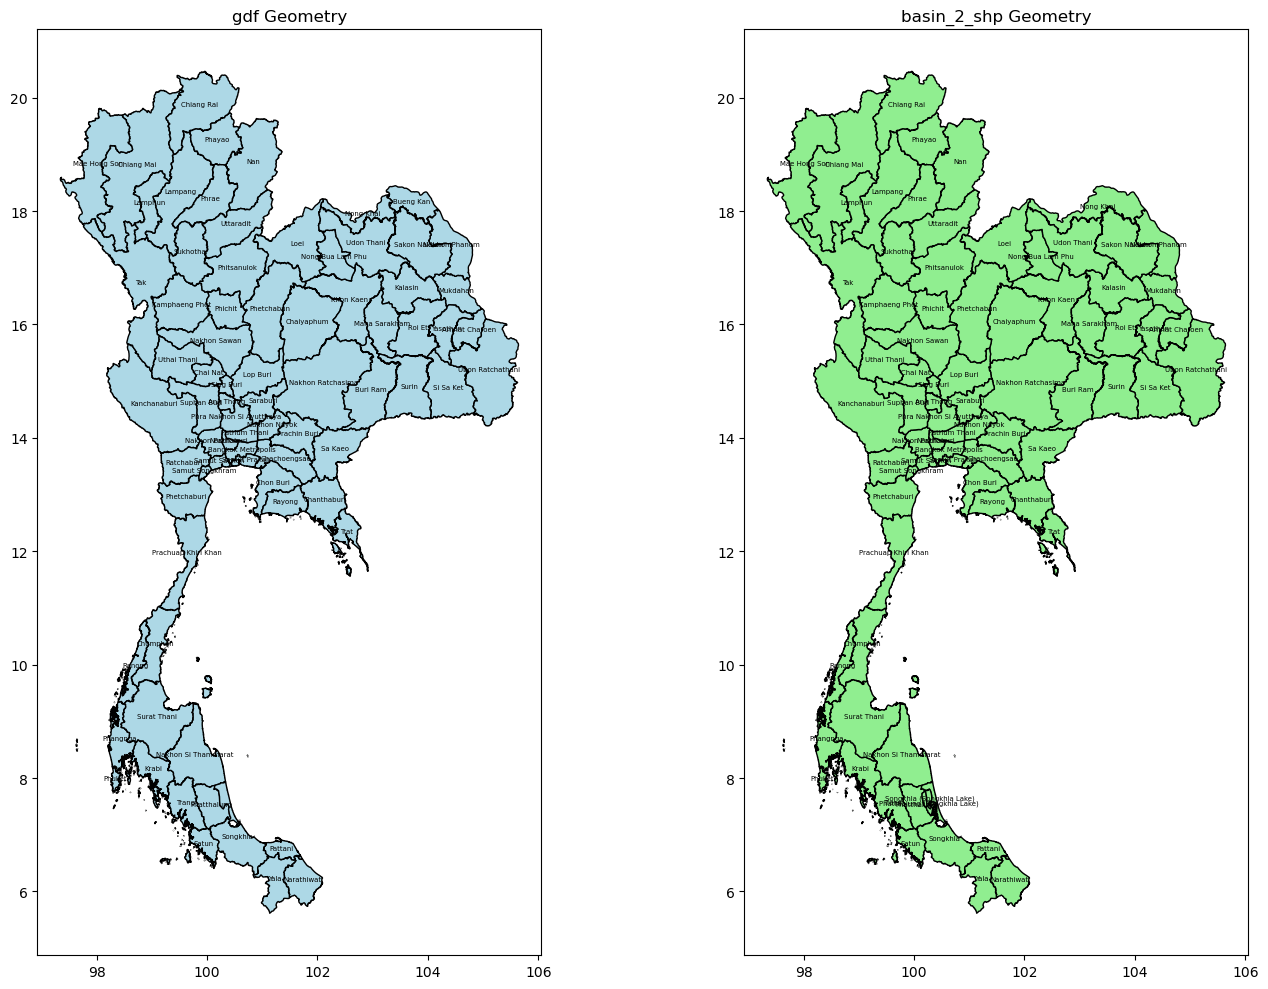

In [153]:
# Create subplots: 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Plot the geometries of `gdf` in the first subplot
province_gdf.plot(ax=ax1, color='lightblue', edgecolor='black')
ax1.set_title('gdf Geometry')
for idx, row in gdf.iterrows():
    ax1.text(row.geometry.centroid.x, row.geometry.centroid.y, row['NAME_1'],
             fontsize=5, ha='center', color='black')

# Plot the geometries of `basin_2_shp` in the second subplot
basin_2_shp.plot(ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('basin_2_shp Geometry')
for idx, row in basin_2_shp.iterrows():
    ax2.text(row.geometry.centroid.x, row.geometry.centroid.y, row['NAME_1'],
             fontsize=5, ha='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

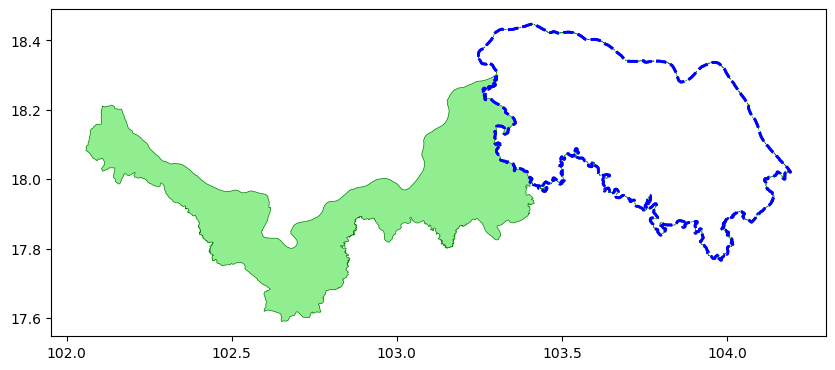

In [243]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Get geometries
nong_khai_basin = basin_2_shp[basin_2_shp['NAME_1'] == 'Nong Khai'].geometry.values[0]
bueng_kan_province = province_gdf[province_gdf['NAME_1'] == 'Bueng Kan'].geometry.values[0]

# 2️⃣ Subtract Bueng Kan from Nong Khai's geometry
corrected_nong_khai = nong_khai_basin.difference(bueng_kan_province)

# 3️⃣ Add Bueng Kan as a new entry using province_gdf's geometry
new_bueng_kan = province_gdf[province_gdf['NAME_1'] == 'Bueng Kan']

# 4️⃣ Update basin_2_shp
# Replace Nong Khai's geometry
basin_2_shp.loc[basin_2_shp['NAME_1'] == 'Nong Khai', 'geometry'] = corrected_nong_khai

# Use pd.concat instead of append
basin_2_shp = pd.concat([basin_2_shp, new_bueng_kan], ignore_index=True)

# ✅ Check the updated boundaries
fig, ax = plt.subplots(figsize=(10, 10))

# Plot corrected Nong Khai
basin_2_shp[basin_2_shp['NAME_1'] == 'Nong Khai'].plot(ax=ax, facecolor='lightgreen', edgecolor='green', linewidth=0.5, label='Corrected Nong Khai')

# Plot newly added Bueng Kan
basin_2_shp[basin_2_shp['NAME_1'] == 'Bueng Kan'].plot(ax=ax, facecolor='none', edgecolor='blue', linestyle='--', linewidth=2, label='Bueng Kan')

plt.show()

In [247]:
len(province_gdf['NAME_1'])

77

In [245]:
len(basin_2_shp['NAME_1'])

80

In [253]:
province_gdf.head(1)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,THA.1_1,THA,Thailand,Amnat Charoen,NA,จังหวัดอำนาจเจริญ,Changwat,Province,37,TH.AC,TH-37,"POLYGON ((104.58696 15.60588, 104.58676 15.605..."


In [255]:
basin_2_shp.head(1)

,ID_0,ISO,NAME_0,ID_1,NAME_1,VARNAME_1,NL_NAME_1,HASC_1,CC_1,TYPE_1,...,VALIDFR_1,VALIDTO_1,REMARKS_1,Shape_Leng,Shape_Area,geometry,GID_1,GID_0,COUNTRY,ISO_1
0,218.0,THA,Thailand,2826.0,Chai Nat,Chainat,?????????????,TH.CN,18,Changwat,...,between 1915 and 1950,Present,None,2.503378,0.207364,"POLYGON ((100.11601 15.41157, 100.11974 15.410...",NaN,NaN,NaN,NaN


In [ ]:
# 2️⃣ Fill NL_NAME_1 in basin_2_shp
# If 'NL_NAME_1' already exists, update it; otherwise, rename the new column
if 'NL_NAME_1' in basin_2_shp.columns:
    basin_2_shp['NL_NAME_1'] = basin_2_shp['NL_NAME_1'].fillna(basin_2_shp['NL_NAME_1_prov'])
    basin_2_shp = basin_2_shp.drop(columns=['NL_NAME_1_prov'])
else:
    basin_2_shp = basin_2_shp.rename(columns={'NL_NAME_1_prov': 'NL_NAME_1'})

# ✅ Check the updated DataFrame
print(basin_2_shp[['NAME_1', 'NL_NAME_1']])


In [269]:
basin_2_shp['NL_NAME_1'] = province_gdf['NL_NAME_1']
basin_2_shp.head(1)

,ID_0,ISO,NAME_0,ID_1,NAME_1,VARNAME_1,NL_NAME_1,HASC_1,CC_1,TYPE_1,...,VALIDFR_1,VALIDTO_1,REMARKS_1,Shape_Leng,Shape_Area,geometry,GID_1,GID_0,COUNTRY,ISO_1
0,218.0,THA,Thailand,2826.0,Chai Nat,Chainat,จังหวัดอำนาจเจริญ,TH.CN,18,Changwat,...,between 1915 and 1950,Present,None,2.503378,0.207364,"POLYGON ((100.11601 15.41157, 100.11974 15.410...",NaN,NaN,NaN,NaN


In [285]:
list(basin_2_shp['NL_NAME_1'])

['จังหวัดอำนาจเจริญ',
 'จังหวัดอ่างทอง',
 'จังหวัดเชียงใหม่',
 'บึงกาฬ',
 'จังหวัดบุรีรัมย์',
 'จังหวัดฉะเชิงเทรา',
 'จังหวัดชัยนาท',
 'จังหวัดชัยนาท',
 'จันทบุรี',
 'จังหวัดเชียงใหม่',
 'จังหวัดเชียงราย',
 'จังหวัดชลบุรี',
 'จังหวัดชุมพร',
 'จังหวัดกาฬสินธุ์',
 'จังหวัดกำแพงเพชร',
 'อำเภอเมืองกาญจนบุรี',
 'จังหวัดขอนแก่น',
 'จังหวัดกระบี่',
 'จังหวัดลำปาง',
 'จังหวัดลำพูน',
 'จังหวัดเลย',
 'ลพบุรี',
 'จังหวัดแม่ฮ่องสอน',
 'จังหวัดมหาสารคาม',
 'จังหวัดมุกดาหาร',
 'จังหวัดนครนายก',
 'อำเภอเมืองนครปฐม',
 'จังหวัดนครพนม',
 'จังหวัดนครราชสีมา',
 'จังหวัดนครสวรรค์',
 'จังหวัดนครศรีธรรมราช',
 'จังหวัดน่าน',
 'จังหวัดนราธิวาส',
 'จังหวัดหนองบัวลำภู',
 'จังหวัดหนองคาย',
 'จังหวัดนนทบุรี',
 'จังหวัดปทุมธานี',
 'จังหวัดปัตตานี',
 'จังหวัดพังงา',
 'จังหวัดพัทลุง',
 'จังหวัดพะเยา',
 'อำเภอเมืองเพชรบูรณ์',
 'จังหวัดเพชรบุรี',
 'จังหวัดพิจิตร',
 'จังหวัดพิษณุโลก',
 'จังหวัดพระนครศรีอยุธยา',
 'จังหวัดแพร่',
 'จังหวัดภูเก็ต',
 'จังหวัดปราจีนบุรี',
 'จังหวัดประจวบคีรีขันธ์',
 'จังหวัดระนอง',
 'จังหวัดร

In [291]:
list(district_gdf['NL_NAME_2'])

['อำเภอชานุมาน',
 'อำเภอหัวตะพาน',
 'อำเภอลืออำนาจ',
 'อำเภอเมืองอำนาจเจริญ',
 'อำเภอปทุมราชวงศา',
 'อำเภอพนา',
 'อำเภอเสนางคนิคม',
 'อำเภอไชโย',
 'อำเภอเมืองอ่างทอง',
 'อำเภอป่าโมก',
 'อำเภอโพธิ์ทอง',
 'อำเภอสามโก้',
 'อำเภอแสวงหา',
 'อำเภอวิเศษชัยชาญ',
 'บางบอน',
 'บางกะป',
 'บางแค',
 'บางเขน',
 'บางคอแหลม',
 'บางนา',
 'บางพลัด',
 'บางรัก',
 'บางซื่อ',
 'บางขุนเทียน',
 'บางกอกน้อย',
 'บางกอกใหญ่',
 'บึงกุ่ม',
 'จตุจักร',
 'จอมทอง',
 'ดินแดง',
 'ดอนเมือง',
 'ดุสิต',
 'ห้วยขวาง',
 'คันนายาว',
 'คลองสามวา',
 'คลองสาน',
 'คลองเตย',
 'หลักส',
 'ลาดกระบัง',
 'ลาดพร้าว',
 'มีนบุรี',
 'หนองจอก',
 'หนองแขม',
 'ปทุมวัน',
 'ภาษีเจริญ',
 'พญาไท',
 'พระนคร',
 'ป้อมปราบศัตรูพ่าย',
 'พระโขนง',
 'ประเวศ',
 'ราษฎร์บูรณะ',
 'ราชเทวี',
 'สายไหม',
 'สัมพันธวงศ์',
 'สะพานสูง',
 'สาทร',
 'สวนหลวง',
 'ตลิ่งชัน',
 'ทวีวัฒนา)',
 'ธนบุร',
 'ทุ่งครุ',
 'วังทองหลาง',
 'วัฒนา',
 'ยานนาวา',
 'อำเภอบึงกาฬ',
 'อำเภอบึงโขงหลง',
 'อำเภอบุ่งคล้า',
 'อำเภอปากคาด',
 'อำเภอพรเจริญ',
 'อำเภอเซกา',
 'อำเภอศรีวิไล',
 'อำเภอ

In [159]:
# Filter 
district_names = basin_3_shp['NAME_2'].isin(district_gdf['NAME_2'])
not_names = basin_3_shp[~district_names]

# Print the rows where there is no match 
print(not_names)

     ID_0  ISO    NAME_0  ID_1                       NAME_1   ID_2 NAME_2  \
572   218  THA  Thailand  2860  Phatthalung (Songkhla Lake)  32846    n.a   
767   218  THA  Thailand  2885     Songkhla (Songkhla Lake)  33083    n.a   

    VARNAME_2 NL_NAME_2 HASC_2  CC_2 TYPE_2 ENGTYPE_2 VALIDFR_2 VALIDTO_2  \
572      None      None   None  None   Lake      Lake   Unknown   Present   
767      None      None   None  None   Lake      Lake   Unknown   Present   

          REMARKS_2  Shape_Leng  Shape_Area  \
572  Lake/Estuarium    2.476057    0.037048   
767  Lake/Estuarium    1.857895    0.031399   

                                              geometry  
572  POLYGON ((100.20776 7.78086, 100.22656 7.67131...  
767  POLYGON ((100.28227 7.80024, 100.28264 7.79996...  


In [161]:
# Filter 
basin_district_names = district_gdf['NAME_2'].isin(basin_3_shp['NAME_2'])
basin_not_names = district_gdf[~basin_district_names]

# Print the rows where there is no match 
print(basin_not_names)

           GID_2 GID_0   COUNTRY     GID_1       NAME_1      NL_NAME_1  \
529  THA.40.11_1   THA  Thailand  THA.40_1  Phatthalung  จังหวัดพัทลุง   
766  THA.64.16_1   THA  Thailand  THA.64_1     Songkhla   จังหวัดสงขลา   

            NAME_2 VARNAME_2 NL_NAME_2      TYPE_2   ENGTYPE_2 CC_2 HASC_2  \
529  Songkhla Lake        NA        NA  Water body  Water body   NA     NA   
766  Songkhla Lake        NA        NA  Water body  Water body   NA     NA   

                                              geometry  
529  POLYGON ((100.24308 7.42821, 100.24162 7.42832...  
766  POLYGON ((100.40638 7.26344, 100.40647 7.26422...  


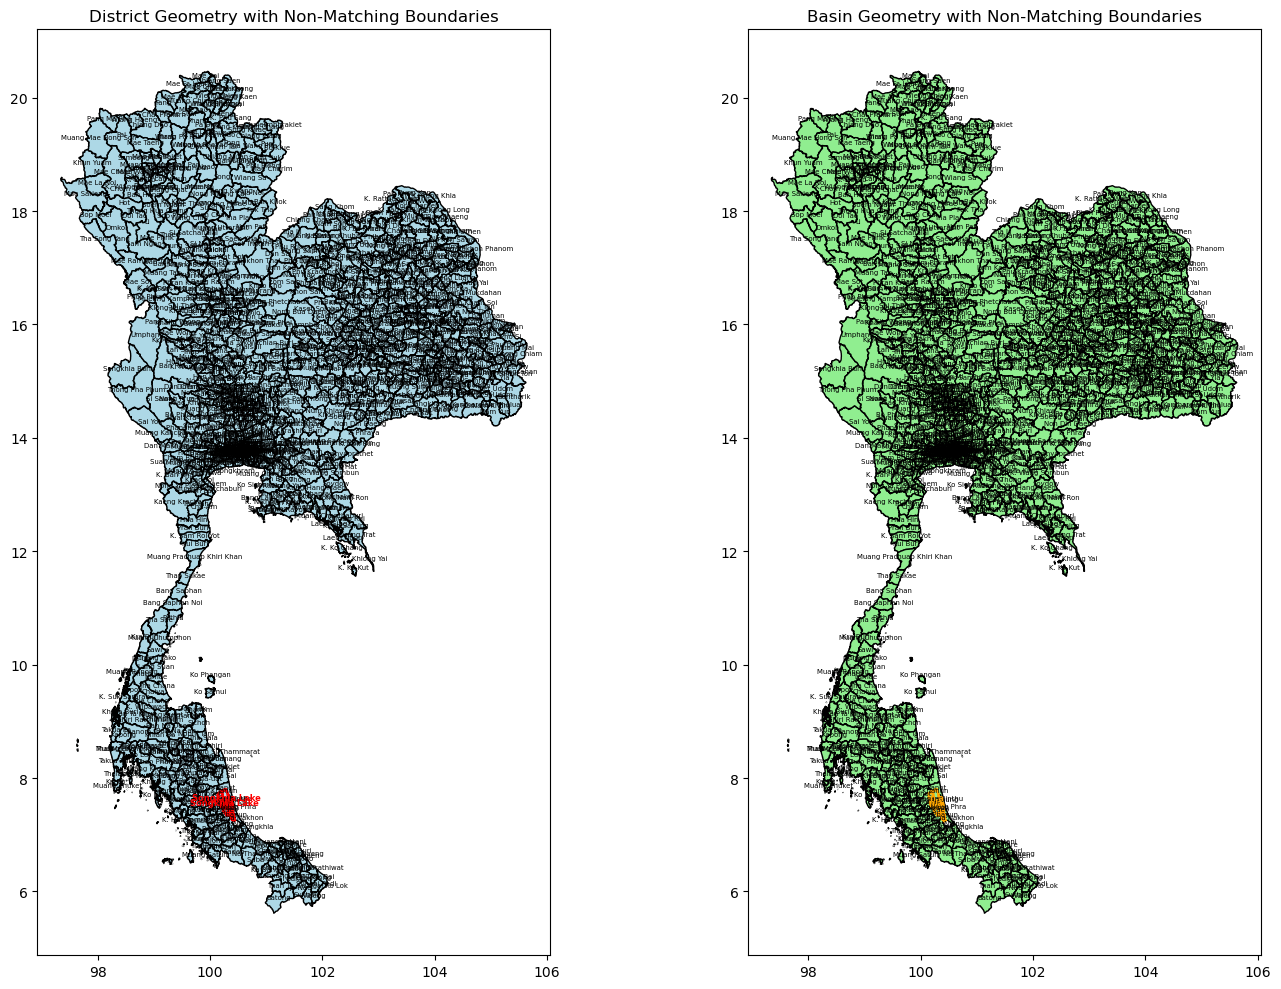

In [167]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Filter: Find non-matching NAME_2 in both datasets
district_names = basin_3_shp['NAME_2'].isin(district_gdf['NAME_2'])
not_names = basin_3_shp[~district_names]  # Non-matching in basin_3_shp

basin_district_names = district_gdf['NAME_2'].isin(basin_3_shp['NAME_2'])
basin_not_names = district_gdf[~basin_district_names]  # Non-matching in district_gdf

# Create subplots: 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# === Plot for district_gdf ===
district_gdf.plot(ax=ax1, color='lightblue', edgecolor='black')
# Highlight non-matching districts with red boundary
basin_not_names.plot(ax=ax1, facecolor='none', edgecolor='red', linewidth=2)

ax1.set_title('District Geometry with Non-Matching Boundaries')
for idx, row in district_gdf.iterrows():
    ax1.text(row.geometry.centroid.x, row.geometry.centroid.y, row['NAME_2'],
             fontsize=5, ha='center', color='black')

# Label non-matching districts differently
for idx, row in basin_not_names.iterrows():
    ax1.text(row.geometry.centroid.x, row.geometry.centroid.y, row['NAME_2'],
             fontsize=6, ha='center', color='red', fontweight='bold')

# === Plot for basin_3_shp ===
basin_3_shp.plot(ax=ax2, color='lightgreen', edgecolor='black')
# Highlight non-matching basins with orange boundary
not_names.plot(ax=ax2, facecolor='none', edgecolor='orange', linewidth=2)

ax2.set_title('Basin Geometry with Non-Matching Boundaries')
for idx, row in basin_3_shp.iterrows():
    ax2.text(row.geometry.centroid.x, row.geometry.centroid.y, row['NAME_2'],
             fontsize=5, ha='center', color='black')

# Label non-matching basins differently
for idx, row in not_names.iterrows():
    ax2.text(row.geometry.centroid.x, row.geometry.centroid.y, row['NAME_2'],
             fontsize=6, ha='center', color='orange', fontweight='bold')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<Axes: >

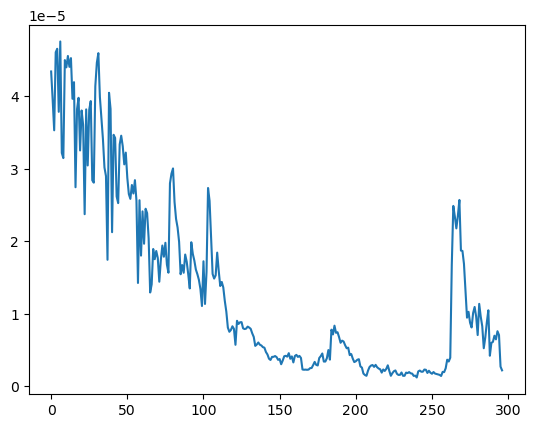

In [76]:
import os
import glob
import scipy.io
import pandas as pd
import geopandas as gpd
import numpy as np

def convert_mat_toExcel(directory_path):
    # Locate all .mat and .shp files
    mat_files = glob.glob(os.path.join(directory_path, "*.mat"))
    shp_files = glob.glob(os.path.join(directory_path, "*.shp"))

    # Mapping shapefile names to their corresponding name columns
    shp_name_mapping = {
        'basin_1': 'MBASIN_T',
        'basin_2': 'NAME_1',
        'basin_3': 'NAME_2'
    }

    # Read all shapefiles into a dictionary
    basin_shp_data = {}
    for shp_file in shp_files:
        shp_name = os.path.splitext(os.path.basename(shp_file))[0]
        if shp_name in shp_name_mapping:
            basin_shp_data[shp_name] = gpd.read_file(shp_file)

    # Process each .mat file
    for mat_file in mat_files:
        try:
            data = scipy.io.loadmat(mat_file, struct_as_record=False)
            dates = data.get('date')

            if date is None:
                print(f"Warning: Missing date in {mat_file}. Skipping.")
                continue
                
            # Convert date array to datetime
            df_dates = pd.DataFrame(dates, columns=['Year', 'Month', 'Day'])
            date_series = pd.to_datetime(df_dates[['Year', 'Month', 'Day']])

            # Identify tss and basin keys
            tss_keys = [key for key in data.keys() if key.startswith('tss')]
            basin_keys = [key for key in data.keys() if key.startswith('basin')]

            # Pair tss with corresponding basin
            for tss_key, basin_key in zip(tss_keys, basin_keys):
                time_series = pd.DataFrame(data[tss_key])
                basin_array = data[basin_key]

                # Extract basin names
                basin_names = [name_array[0][0] for name_array in basin_array]

                # Rename columns to basin names
                time_series.columns = basin_names

                # Combine date and time series
                df_combined = pd.concat([date_series.rename('Date'), time_series], axis=1)

                # Create output file name
                output_file = os.path.splitext(os.path.basename(mat_file))[0] + f"_{basin_key}.xlsx"

                # Save to Excel
                output_path = os.path.join(directory_path, output_file)
                df_combined.to_excel(output_path, index=False)

                print(f"✅ Successfully processed: {output_file}")

        except Exception as e:
            print(f"❌ Error processing {mat_file}: {e}")

    return df_combined

In [117]:
import os
import glob
import scipy.io
import pandas as pd
import geopandas as gpd
import numpy as np

def convert_mat_toExcel(directory_path):
    # Locate all .mat and .shp files
    mat_files = glob.glob(os.path.join(directory_path, "*.mat"))
    shp_files = glob.glob(os.path.join(directory_path, "*.shp"))

    # Mapping shapefile names to their corresponding name columns
    shp_name_mapping = {
        'basin_1': 'MBASIN_E',
        'basin_2': 'NAME_1',
        'basin_3': 'NAME_2'
    }

    # Read all shapefiles into a dictionary
    basin_shp_data = {}
    for shp_file in shp_files:
        shp_name = os.path.splitext(os.path.basename(shp_file))[0]
        if shp_name in shp_name_mapping:
            basin_shp_data[shp_name] = gpd.read_file(shp_file)

    # Process each .mat file
    for mat_file in mat_files:
        try:
            data = scipy.io.loadmat(mat_file, struct_as_record=False)
            dates = data.get('date')

            if date is None:
                print(f"Warning: Missing date in {mat_file}. Skipping.")
                continue
                
            # Convert date array to datetime
            df_dates = pd.DataFrame(dates, columns=['Year', 'Month', 'Day'])
            date_series = pd.to_datetime(df_dates[['Year', 'Month', 'Day']])

            # Identify tss and basin keys
            tss_keys = [key for key in data.keys() if key.startswith('tss')]
            basin_keys = [key for key in data.keys() if key.startswith('basin')]

            # Pair tss with corresponding basin
            for tss_key, basin_key in zip(tss_keys, basin_keys):
                time_series = pd.DataFrame(data[tss_key])
                basin_array = data[basin_key]

                # Extract basin names
                basin_names = [name_array[0][0] for name_array in basin_array]

                # Rename columns to basin names
                time_series.columns = basin_names

                # Combine date and time series
                df_combined = pd.concat([date_series.rename('Date'), time_series], axis=1)

                # Create output file name
                output_file = os.path.splitext(os.path.basename(mat_file))[0] + f"_{basin_key}.xlsx"

                # Save to Excel
                output_path = os.path.join(directory_path, output_file)
                df_combined.to_excel(output_path, index=False)

                print(f"✅ Successfully processed: {output_file}")

        except Exception as e:
            print(f"❌ Error processing {mat_file}: {e}")

    return df_combined

In [120]:
ds = convert_mat_toExcel(directory_path = 'tss_format')
print(ds)

✅ Successfully processed: tss_format_basin_1.xlsx
✅ Successfully processed: tss_format_basin_2.xlsx
✅ Successfully processed: tss_format_basin_3.xlsx
          Date  K. Kut Rang   Kae Dam  Kantharawichai  Kosum Phisai  \
0   2024-08-08     0.000031  0.000043        0.000046      0.000035   
1   2024-08-09     0.000043  0.000040        0.000048      0.000047   
2   2024-08-10     0.000037  0.000035        0.000042      0.000041   
3   2024-08-11     0.000039  0.000046        0.000050      0.000046   
4   2024-08-12     0.000040  0.000047        0.000045      0.000043   
..         ...          ...       ...             ...           ...   
292 2025-05-27     0.000009  0.000006        0.000006      0.000008   
293 2025-05-28     0.000009  0.000008        0.000007      0.000009   
294 2025-05-29     0.000008  0.000007        0.000007      0.000008   
295 2025-05-30     0.000002  0.000003        0.000003      0.000002   
296 2025-05-31     0.000002  0.000002        0.000002      0.000002  

In [ ]:
py convert_mat_to_excel.py --directory "tss_format"

In [ ]:
py convert_mat_to_excel.py --help

In [90]:
import os
import glob
import scipy.io
import pandas as pd
import geopandas as gpd
import numpy as np

def convert_mat_toExcel(directory_path, output_file):
    # Locate all .mat and .shp files
    mat_files = glob.glob(os.path.join(directory_path, "*.mat"))
    shp_files = glob.glob(os.path.join(directory_path, "*.shp"))

    # Mapping shapefile names to their corresponding name columns
    shp_name_mapping = {
        'basin_1': 'MBASIN_E',
        'basin_2': 'NAME_1',
        'basin_3': 'NAME_2'
    }

    # Read all shapefiles into a dictionary
    basin_shp_data = {}
    for shp_file in shp_files:
        shp_name = os.path.splitext(os.path.basename(shp_file))[0]
        if shp_name in shp_name_mapping:
            basin_shp_data[shp_name] = gpd.read_file(shp_file)

    # Process each .mat file
    for mat_file in mat_files:
        try:
            data = scipy.io.loadmat(mat_file, struct_as_record=False)
            date = data.get('date')

            if date is None:
                print(f"Warning: Missing date in {mat_file}. Skipping.")
                continue

            # Convert date to datetime format
            df_date = pd.DataFrame(date, columns=['Year', 'Month', 'Day'])

            # Identify tss and basin keys
            tss_keys = [key for key in data.keys() if key.startswith('tss')]
            basin_keys = [key for key in data.keys() if key.startswith('basin')]

            # Pair tss with corresponding basin
            for tss_key, basin_key in zip(tss_keys, basin_keys):
                time_series = pd.DataFrame(data[tss_key])
                basin_array = data[basin_key]

                # Extract basin names
                basin_names = [name_array[0][0] for name_array in basin_array]

                # Rename columns to basin names
                time_series.columns = basin_names

                # Combine date and time series
                df_combined = pd.concat([df_date, time_series], axis=1)

                # Create output file name
                output_file = os.path.splitext(os.path.basename(mat_file))[0] + f"_{basin_key}.xlsx"

                # Save to Excel
                output_path = os.path.join(directory_path, output_file)
                df_combined.to_excel(output_path, index=False)

                print(f"✅ Successfully processed: {output_file}")

        except Exception as e:
            print(f"❌ Error processing {mat_file}: {e}")

    return df_combined

In [86]:
ds = convert_mat_toExcel(directory_path = 'tss_format')

✅ Successfully processed: tss_format_basin_1.xlsx
✅ Successfully processed: tss_format_basin_2.xlsx
✅ Successfully processed: tss_format_basin_3.xlsx


In [62]:
len(basin_array)

928

In [66]:
df_ts_long.tail()

,Time_Index,Basin_Code,TSS,Basin_Name
275611,292,927,5.048632e-06,Thai Charoen
275612,293,927,4.813345e-06,Thai Charoen
275613,294,927,4.258965e-06,Thai Charoen
275614,295,927,1.227937e-06,Thai Charoen
275615,296,927,7.003110e-07,Thai Charoen


In [48]:
all_data

[      Time_Index Basin_Code_x       TSS                       Basin_Name  \
 0              0            0  0.000018                          Salawin   
 1              1            0  0.000020                          Salawin   
 2              2            0  0.000018                          Salawin   
 3              3            0  0.000020                          Salawin   
 4              4            0  0.000017                          Salawin   
 ...          ...          ...       ...                              ...   
 7717         292           25  0.000006  Peninsula - West Coast (Island)   
 7718         293           25  0.000006  Peninsula - West Coast (Island)   
 7719         294           25  0.000011  Peninsula - West Coast (Island)   
 7720         295           25  0.000012  Peninsula - West Coast (Island)   
 7721         296           25  0.000006  Peninsula - West Coast (Island)   
 
       Year  Month  Day       Date MB_CODE                  MBASIN_T  \
 0

In [1]:
import os
import glob
import scipy.io
import pandas as pd
import geopandas as gpd
import numpy as np

def convert_mat_toExcel(directory_path, file_type=None, basin_filter=None, output_file='time_series.xlsx'):
    # Locate all .mat and .shp files
    mat_files = glob.glob(os.path.join(directory_path, "*.mat"))
    shp_files = glob.glob(os.path.join(directory_path, "*.shp"))

    # Mapping shapefile names to their respective basin name columns
    shp_name_mapping = {
        'basin_1': 'MBASIN_E',
        'basin_2': 'NAME_1',
        'basin_3': 'NAME_2'
    }

    # Read all shapefiles into a dictionary
    basin_shp_data = {}
    for shp_file in shp_files:
        shp_name = os.path.splitext(os.path.basename(shp_file))[0]
        if shp_name in shp_name_mapping:
            basin_shp_data[shp_name] = gpd.read_file(shp_file)

    all_data = []  # Store combined data from all .mat files

    # Loop through each .mat file
    for mat_file in mat_files:
        try:
            data = scipy.io.loadmat(mat_file, struct_as_record=False)

            # Identify tss and basin keys dynamically
            tss_keys = [key for key in data.keys() if key.startswith('tss')]
            basin_keys = [key for key in data.keys() if key.startswith('basin')]
            date = data.get('date')

            if not tss_keys or not basin_keys or date is None:
                print(f"Warning: Missing variables in file {mat_file}. Skipping.")
                continue

            # Convert date to datetime
            df_date = pd.DataFrame(date, columns=['Year', 'Month', 'Day'])
            df_date['Date'] = pd.to_datetime(df_date[['Year', 'Month', 'Day']])

            # Ensure tss and basin keys are paired correctly
            for tss_key, basin_key in zip(tss_keys, basin_keys):
                time_series = pd.DataFrame(data[tss_key])
                basin_array = data[basin_key]

                # Extract basin names
                basin_names = [name_array[0][0] for name_array in basin_array]

                # Reshape time series to long format
                df_ts_long = time_series.reset_index().melt(id_vars='index', var_name='Basin_Code', value_name='TSS')
                df_ts_long.rename(columns={'index': 'Time_Index'}, inplace=True)

                # Map Basin_Code to Basin Names
                basin_code_to_name = {i: name for i, name in enumerate(basin_names)}
                df_ts_long['Basin_Name'] = df_ts_long['Basin_Code'].map(basin_code_to_name)

                # Merge with date
                df_combined = pd.merge(df_ts_long, df_date, left_on='Time_Index', right_index=True)

                # Merge with corresponding shapefile
                shapefile_data = basin_shp_data.get(basin_key)
                name_column = shp_name_mapping.get(basin_key)

                if shapefile_data is not None and name_column:
                    df_combined = df_combined.merge(shapefile_data, left_on='Basin_Name', right_on=name_column, how='left')

                all_data.append(df_combined)

            print(f"Successfully processed: {mat_file}")

        except Exception as e:
            print(f"Error processing file {mat_file}: {e}")

    # Combine data from all files
    df_final = pd.concat(all_data, ignore_index=True)

    # Select columns for export
    columns = ['Time_Index', 'Date', 'Basin_Name', 'TSS', 'geometry']
    additional_columns = [col for col in df_final.columns if col.startswith('MB_') or col.startswith('NAME_')]

    # Combine all columns needed for export
    columns.extend(additional_columns)
    df_final = df_final.loc[:, columns]

    # Export to Excel or CSV
    if file_type == 'excel':
        with pd.ExcelWriter(output_file) as writer:
            if basin_filter:
                df_final = df_final[df_final['Basin_Name'] == basin_filter]
                final_columns = ['Time_Index', 'Date', 'TSS', 'Basin_Name', 'geometry']
                df_final = df_final.loc[:, final_columns]
                
                df_final.to_excel(writer, sheet_name=basin_filter[:31], index=False)
            else:
                for basin, group in df_final.groupby('Basin_Name'):
                    group.to_excel(writer, sheet_name=basin[:31], index=False)

    elif file_type == 'csv':
        if basin_filter:
            df_final = df_final[df_final['Basin_Name'] == basin_filter]
            final_columns = ['Time_Index', 'Date', 'TSS', 'Basin_Name', 'geometry']
            df_final = df_final.loc[:, final_columns]
            df_final.to_csv(output_file, index=False)
        else:
            df_final.to_csv(output_file, index=False)

    return df_final

In [5]:
convert_mat_toExcel(directory_path = 'tss_format', file_type='excel', basin_filter='Chi', output_file='Chi_time_series.xlsx')

Successfully processed: tss_format\tss_format.mat


,Time_Index,Date,TSS,Basin_Name,geometry
891,0,2024-08-08,0.000031,Chi,"POLYGON ((104.30055 16.29538, 104.30023 16.295..."
892,1,2024-08-09,0.000037,Chi,"POLYGON ((104.30055 16.29538, 104.30023 16.295..."
893,2,2024-08-10,0.000038,Chi,"POLYGON ((104.30055 16.29538, 104.30023 16.295..."
894,3,2024-08-11,0.000039,Chi,"POLYGON ((104.30055 16.29538, 104.30023 16.295..."
895,4,2024-08-12,0.000038,Chi,"POLYGON ((104.30055 16.29538, 104.30023 16.295..."
...,...,...,...,...,...
1183,292,2025-05-27,0.000006,Chi,"POLYGON ((104.30055 16.29538, 104.30023 16.295..."
1184,293,2025-05-28,0.000006,Chi,"POLYGON ((104.30055 16.29538, 104.30023 16.295..."
1185,294,2025-05-29,0.000006,Chi,"POLYGON ((104.30055 16.29538, 104.30023 16.295..."
1186,295,2025-05-30,0.000002,Chi,"POLYGON ((104.30055 16.29538, 104.30023 16.295..."


In [10]:
import os
import glob
import scipy.io
import pandas as pd
import geopandas as gpd
import numpy as np

def convert_mat_toExcel(directory_path):
    # Locate all .mat and .shp files
    mat_files = glob.glob(os.path.join(directory_path, "*.mat"))
    shp_files = glob.glob(os.path.join(directory_path, "*.shp"))

    # Mapping shapefile names to their corresponding name columns
    shp_name_mapping = {
        'basin_1': 'MBASIN_E',
        'basin_2': 'NAME_1',
        'basin_3': 'NAME_2'
    }

    # Read all shapefiles into a dictionary
    basin_shp_data = {}
    for shp_file in shp_files:
        shp_name = os.path.splitext(os.path.basename(shp_file))[0]
        if shp_name in shp_name_mapping:
            basin_shp_data[shp_name] = gpd.read_file(shp_file)

    # Process each .mat file
    for mat_file in mat_files:
        try:
            data = scipy.io.loadmat(mat_file, struct_as_record=False)
            date = data.get('date')

            if date is None:
                print(f"Warning: Missing date in {mat_file}. Skipping.")
                continue

            # Convert date to datetime format
            df_date = pd.DataFrame(date, columns=['Year', 'Month', 'Day'])

            # Identify tss and basin keys
            tss_keys = [key for key in data.keys() if key.startswith('tss')]
            basin_keys = [key for key in data.keys() if key.startswith('basin')]

            # Pair tss with corresponding basin
            for tss_key, basin_key in zip(tss_keys, basin_keys):
                time_series = pd.DataFrame(data[tss_key])
                basin_array = data[basin_key]

                # Extract basin names
                basin_names = [name_array[0][0] for name_array in basin_array]

                # Rename columns to basin names
                time_series.columns = basin_names

                # Combine date and time series
                df_combined = pd.concat([df_date, time_series], axis=1)

                # Create output file name
                output_file = os.path.splitext(os.path.basename(mat_file))[0] + f"_{basin_key}.xlsx"

                # Save to Excel
                output_path = os.path.join(directory_path, output_file)
                df_combined.to_excel(output_path, index=False)

                print(f"✅ Successfully processed: {output_file}")

        except Exception as e:
            print(f"❌ Error processing {mat_file}: {e}")

In [12]:
ds = convert_mat_toExcel("tss_format")
print(ds)

✅ Successfully processed: tss_format_basin_1.xlsx
✅ Successfully processed: tss_format_basin_2.xlsx
✅ Successfully processed: tss_format_basin_3.xlsx
None


In [ ]:
# Example usage
if __name__ == "__main__":
    convert_mat_toExcel(directory_path=r"D:\Dom_Work\A_Work\Work\01_AIT\08_etc\05_Ts-Excel\tss_format")

In [ ]:
cd C:\Users\ASUS\Jupyter
py convert_mat_to_excel.py

In [ ]:
py convert_mat_to_excel.py --help

In [ ]:
py convert_mat_to_excel.py --basin "North Khong" --file_type excel --output north_khong_time_series.xlsx

In [ ]:
# Entry point to run the script from the command line
if __name__ == "__main__":
    directory = r"D:\Dom_Work\A_Work\Work\01_AIT\08_etc\05_Ts-Excel\tss_format"
    convert_mat_toExcel(directory_path=directory, file_type='excel', basin_filter='Salawin', output_file='time_series.xlsx')